In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns

plt.rc('font', family = 'malgun Gothic')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
공사장_지수_mms = pd.read_csv("공사장_지수.csv", encoding = 'cp949')
교통량_지수_mms = pd.read_csv("교통량_지수.csv", encoding = 'cp949')
교통속도_지수_mms = pd.read_csv("speed_final.csv", encoding = 'cp949')
도로재비산먼지_지수 = pd.read_csv("도로재비산먼지_지수.csv", encoding ='cp949')

In [20]:
교통속도_지수_mms.head()

,Unnamed: 0,거리,차선수,Latitude,Longitude,speed_mean,speed_mean_차선수_mul,교통속도_지수_mms,교통속도_지수_log
0,0,1179,1.0,37.644449,127.004529,38.673750,38.673750,0.052063,3.655161
1,1,1179,1.0,37.644449,127.004529,41.226667,41.226667,0.056052,3.719085
2,2,1179,1.0,37.644449,127.004529,39.794583,39.794583,0.053814,3.683731
3,3,1179,1.0,37.644449,127.004529,40.422083,40.422083,0.054795,3.699376
4,4,1179,1.0,37.644449,127.004529,40.870000,40.870000,0.055495,3.710396


In [21]:
교통량_지수_mms.head()

,지점명,Latitude,Longitude,교통량,위도,경도,year,month,교통량_지수_mms
0,가양대교,37.569323,126.860995,38003617,37.571567,126.862726,2024,1,0.399025
1,강남대로(강남역-신분당),37.497952,127.027619,18650428,37.490590,127.031160,2024,1,0.184101
2,강남대로(신사역),37.523533,127.023066,26565716,37.514859,127.020098,2024,1,0.272003
3,강변북로(구리시계),37.573773,127.128338,46791931,37.558389,127.114274,2024,1,0.496622
4,강변북로(난지한강공원),37.566015,126.876518,92119629,37.570903,126.872321,2024,1,1.000000


In [22]:
공사장_지수_mms.head()

,번호,사업자명(상호),공사장명,소재지도로명주소,Latitude,Longitude,소재지지번주소,Latitude.1,Longitude.1,관리기관명,...,종료_year,종료_month,시작_year,시작_month,공사분류,공사분류_인코딩,운영기간,지속기간,공사장_지수,공사장_지수_mms
0,1,(주)계룡건설산업,경부선 원효가도교 개량공사,"서울특별시 용산구 한강대로77길 25, 남영역 (갈월동)",37.541624,126.971237,서울특별시 용산구 갈월동 96-1 남영역,37.541624,126.971237,서울특별시 용산구,...,2026,7,2023,3,토목공사,4,9.116667,12,36.466667,0.451070
1,2,도시건축종합건설(주),재동 32-10 근린생활시설 신축공사,서울특별시 종로구 재동 32-10,37.579241,126.984249,서울특별시 종로구 재동 32-10,37.579241,126.984249,서울특별시 종로구,...,2024,7,2023,6,건축공사,3,6.066667,12,18.200000,0.224916
2,6,(주)서우건설산업,2023년 능동로 가로등 개량공사,서울특별시 광진구 중곡동 158-7~중곡동16,37.557647,127.080876,서울특별시 광진구 중곡동 158-7~중곡동16,37.557647,127.080876,서울특별시 광진구,...,2023,11,2023,5,토목공사,4,7.083333,11,25.972222,0.321142
3,7,보형포장건설(주),수출의다리~독산역일대 노후도로 정비공사,서울특별시 금천구 벚꽃로 244(가산동),37.476690,126.885808,서울특별시 금천구 가산동 60-73 ~독산동 1001-14 도로,37.476690,126.885808,서울특별시 금천구,...,2023,6,2023,3,기타공사,2,9.116667,6,9.116667,0.112458
4,9,홍대 및 경의선숲길 주변 도로정비공사,홍대 및 경의선숲길 주변 도로정비공사,서울특별시 마포구 성미산로 112 (연남동),37.562062,126.919576,서울특별시 마포구 연남동 504-1,37.562062,126.919576,서울특별시 마포구,...,2023,5,2023,5,개발공사,4,7.083333,5,11.805556,0.145748


In [23]:
scaler = MinMaxScaler()
# 공사장_지수
공사장_지수_mms['공사장_지수_mms'] = scaler.fit_transform(공사장_지수_mms['공사장_지수'].values.reshape(-1, 1))
공사장_지수_mms['공사장_지수_log'] = np.log(공사장_지수_mms['공사장_지수'])

# 교통량_지수
교통량_지수_mms['교통량_지수_mms'] = scaler.fit_transform(교통량_지수_mms['교통량'].values.reshape(-1, 1))
교통량_지수_mms['교통량_지수_log'] = np.log(교통량_지수_mms['교통량'])

# 교통속도_지수
교통속도_지수_mms['교통속도_지수_mms'] = scaler.fit_transform(교통속도_지수_mms['speed_mean_차선수_mul'].values.reshape(-1, 1))
교통속도_지수_mms['교통속도_지수_log'] = np.log(교통속도_지수_mms['speed_mean_차선수_mul'])

##### 교통량 지수에 대해서 log, MinMaxScaler(), 기본 값들에 대해 시각화

<Axes: xlabel='교통량', ylabel='Density'>

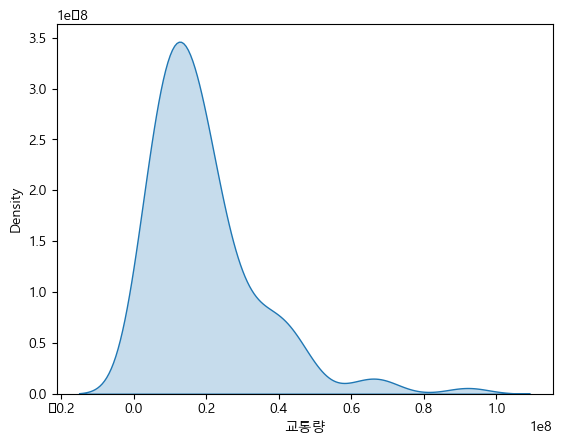

In [24]:
import seaborn as sns
sns.kdeplot(교통량_지수_mms['교통량'],shade = True)

<Axes: xlabel='교통량_지수_mms', ylabel='Density'>

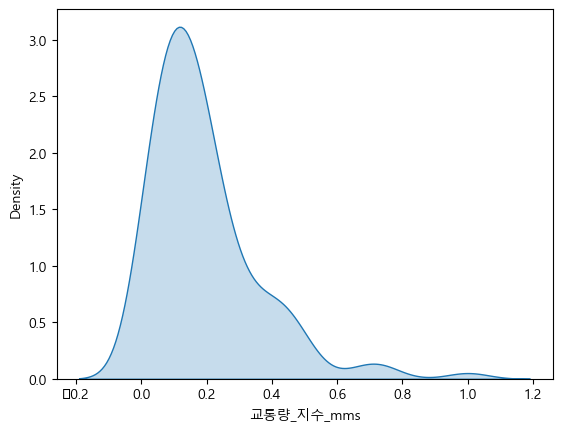

In [25]:
import seaborn as sns
sns.kdeplot(교통량_지수_mms['교통량_지수_mms'],shade = True)

##### 공사장 지수에 대해서 log, MinMaxScaler(), 기본 값들에 대해 시각화

<Axes: xlabel='공사장_지수', ylabel='Density'>

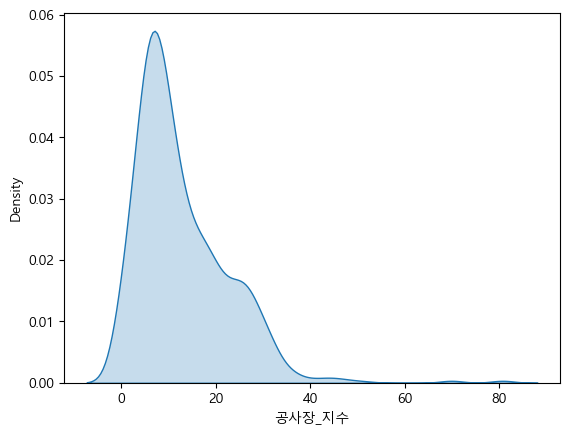

In [26]:
import seaborn as sns
sns.kdeplot(공사장_지수_mms['공사장_지수'],shade = True)

<Axes: xlabel='공사장_지수_mms', ylabel='Density'>

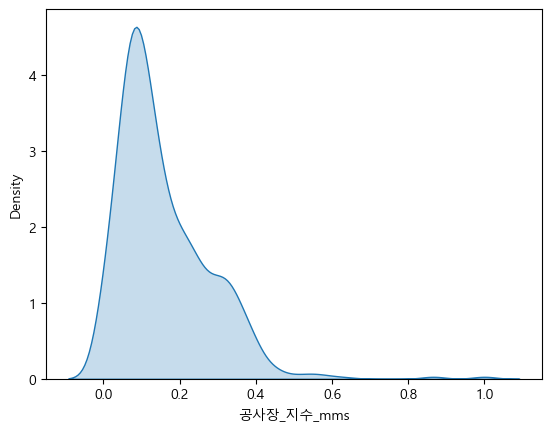

In [27]:
import seaborn as sns
sns.kdeplot(공사장_지수_mms['공사장_지수_mms'],shade = True)

##### 교통속도 지수에 대해서 log, MinMaxScaler(), 기본 값들에 대해 시각화

<Axes: xlabel='speed_mean_차선수_mul', ylabel='Density'>

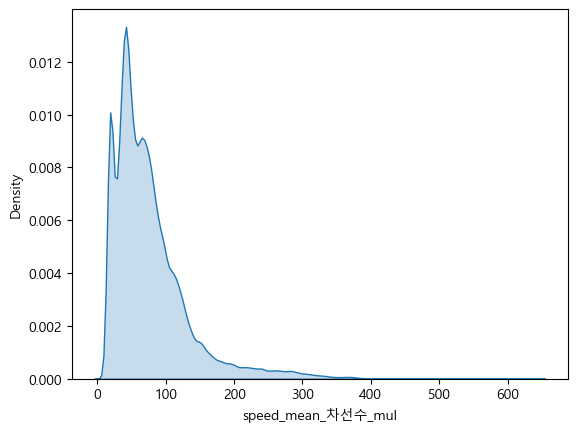

In [16]:
import seaborn as sns
sns.kdeplot(교통속도_지수_mms['speed_mean_차선수_mul'],shade = True)

<Axes: xlabel='교통속도_지수_log', ylabel='Density'>

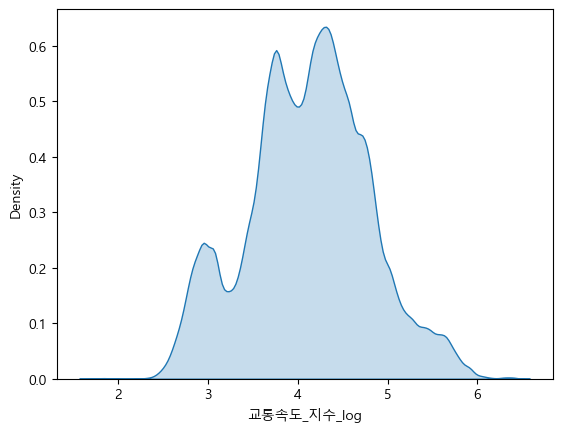

In [29]:
import seaborn as sns
sns.kdeplot(교통속도_지수_mms['교통속도_지수_log'],shade = True)

In [30]:
교통속도_지수_mms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579910 entries, 0 to 1579909
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Unnamed: 0          1579910 non-null  int64  
 1   거리                  1579910 non-null  int64  
 2   차선수                 1577840 non-null  float64
 3   Latitude            1579910 non-null  float64
 4   Longitude           1579910 non-null  float64
 5   speed_mean          1579910 non-null  float64
 6   speed_mean_차선수_mul  1577840 non-null  float64
 7   교통속도_지수_mms         1577840 non-null  float64
 8   교통속도_지수_log         1577840 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 108.5 MB


In [13]:
공사장_지수_mms.drop('번호', axis =1, inplace = True)

In [28]:
교통량_지수_mms.to_csv("교통량_지수_mms.csv", index = False, encoding ='cp949')
공사장_지수_mms.to_csv("공사장_지수_mms.csv", index = False, encoding ='cp949')
교통속도_지수_mms.to_csv("교통속도_지수_log.csv", index = False, encoding = 'cp949')